# Time Series Forecasting
Examples of time series forecasting. Here are some articles if you are interested in learning more:
* <a href="https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/">11 Classical Time Series Forecasting Methods in Python (Cheat Sheet)</a>

## Imports

In [1]:
from numpy.random import seed
from numpy.random import randn
from math import sin, fabs, sqrt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset Generation
We generate a dataset to be used in the examples

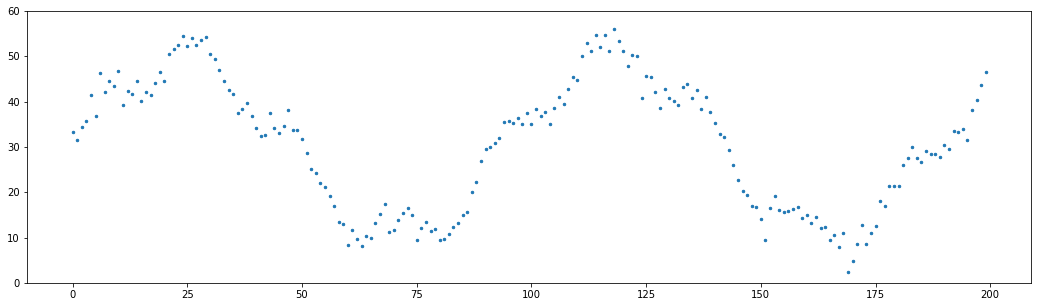

In [2]:
seed(1)
no = 200
# Generate univariate observations
x = []
y = []
for i in range(0,no):
    x.append(sin(i/15) * 20 + sin(i/3.5) * 5 + randn() * 2 + 30)
    y.append(i)

# Plot
plt.figure(figsize=(18,5))
plt.ylim(0,60)
plt.scatter(y,x,s=6)
plt.show()

# Settings
winsize = 4
xt = x[winsize-1:]
yt = y[winsize-1:]

## Useful functions

In [3]:
def calc_error(xhat):
    # Calculate error
    mse = 0
    mae = 0
    for v,vhat in zip(xt, xhat):
        mae += fabs(v-vhat)
        mse += (v-vhat)**2
    mae /= len(xt)
    mse /= len(xt)

    print("Result: mae={0:.3f}, mse={1:.3f}, rmse={2:.3f}".format(mae, mse, sqrt(mse)))
    
def plot_result(xhat):
    # Plot
    plt.figure(figsize=(18,5))
    plt.ylim(0,60)
    plt.scatter(yt, xt, c="blue", s=6)
    plt.scatter(yt, xhat, c="red", s=6)
    plt.show()

## Autoregression (AR)

Result: mae=0.678, mse=0.764, rmse=0.874


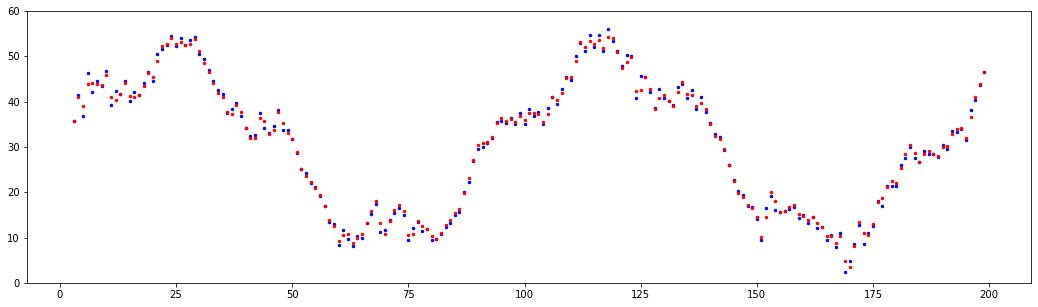

In [4]:
# Fit model
model = AutoReg(x, lags=winsize)
model_fit = model.fit()
# Make prediction
xhat = model_fit.predict(0, len(x))
# Show results
calc_error(xhat)
plot_result(xhat)

## Moving Average (MA)

Result: mae=6.956, mse=66.535, rmse=8.157


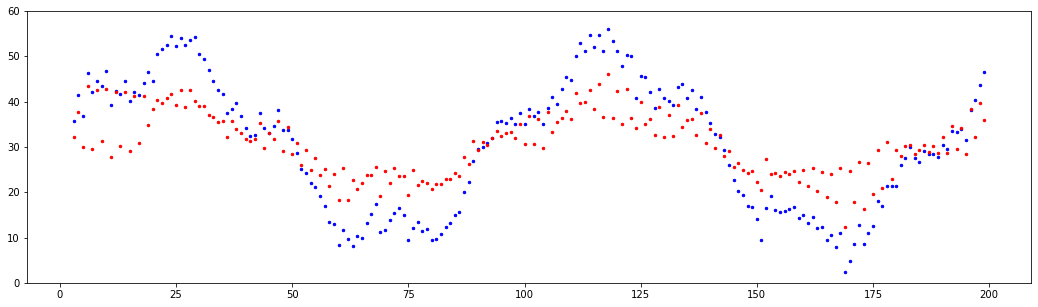

In [5]:
# Fit model
model = ARMA(x, order=(0,1))
model_fit = model.fit(disp=False)
# Make prediction
xhat = model_fit.predict(winsize, len(x))
# Show results
calc_error(xhat)
plot_result(xhat)

## Autoregressive Moving Average (ARMA)

Result: mae=0.411, mse=0.258, rmse=0.508


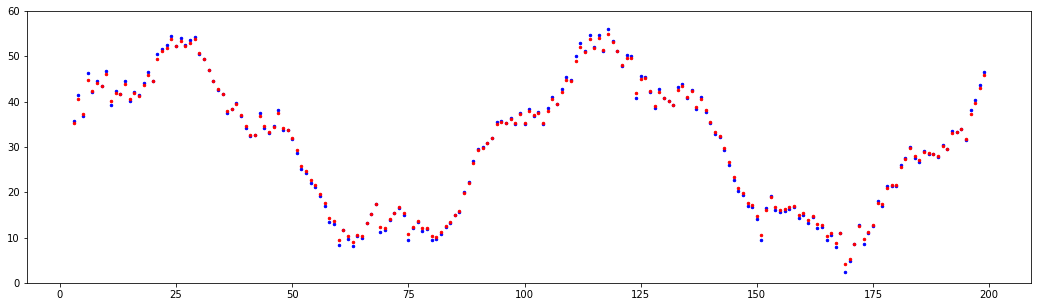

In [6]:
# Fit model
model = ARMA(x, order=(1,1))
model_fit = model.fit(disp=False)
# Make prediction
xhat = model_fit.predict(winsize, len(x))
# Show results
calc_error(xhat)
plot_result(xhat)

## Seasonal Autoregressive Integrated Moving-Average (SARIMA)

Result: mae=1.774, mse=6.377, rmse=2.525


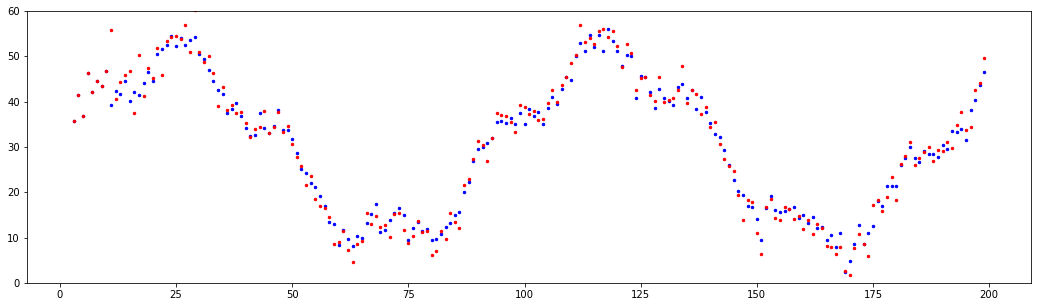

In [7]:
# Fit model
model = SARIMAX(x, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)
# Make prediction
xhat = model_fit.predict(winsize, len(x))
# Show results
calc_error(xhat)
plot_result(xhat)

## Simple Exponential Smoothing (SES)

Result: mae=0.329, mse=0.161, rmse=0.401


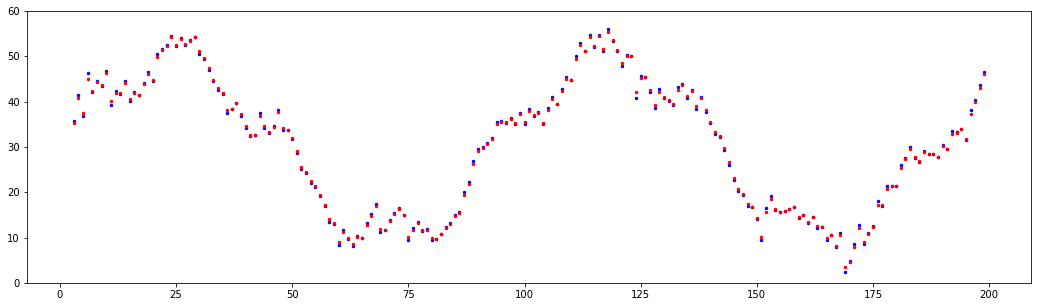

In [8]:
# Fit model
model = SimpleExpSmoothing(x)
model_fit = model.fit()
# Make prediction
xhat = model_fit.predict(winsize, len(x))
# Show results
calc_error(xhat)
plot_result(xhat)

## Holt Winter’s Exponential Smoothing (HWES)

Result: mae=0.329, mse=0.161, rmse=0.401


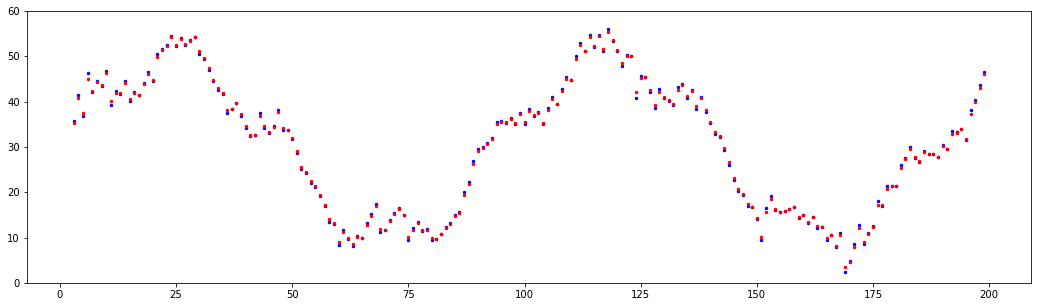

In [9]:
# Fit model
model = ExponentialSmoothing(x)
model_fit = model.fit()
# Make prediction
xhat = model_fit.predict(winsize, len(x))
# Show results
calc_error(xhat)
plot_result(xhat)